**Determining Histogram Bin Width using the Freedman-Diaconis Rule**

In [1]:
import pandas as pd

Histograms are used to estimate the probability distribution of a continuous random variable. They are frequently used as an exploratory data analysis starting point, and provide insight into the shape and variability of the data in question. One of the challenges in constructing histograms is selecting the optimal number of bins (or, analagously, the width of each bin). To help determine a reasonable bin width, we can leverage the Freedman-Diaconis rule, which was designed to minimize the difference between the area under the empirical probability distribution and the area under the theoretical probability distribution[1]. Formally, the rule takes as input the interquartile range IQR(x) and the number of observations n in the empirical dataset, and returns a bin width estimate. The rule can be expressed as:

Bin width=2IQR(x)/3√n

The interquartile range is defined as the difference between the largest and smallest values in the middle 50% of an empirical dataset. Within the context of Scipy, IQR can be calculated using stats.iqr, but it can readily be calculated by hand.

In [13]:
data = [
    62.55976, -14.71019, -20.67025, -35.43758, -10.65457,  21.55292, 
    41.26359,   0.33537, -14.43599, -40.66612,   6.45701, -40.39694, 
     55.1221,  24.50901,   6.61822, -29.10305,   6.21494,  15.25862,  
    13.54446,   2.48212,  -2.34573, -21.47846,   -5.0777,  26.48881, 
    -8.68764,  -5.49631,  42.58039,  -6.59111, -23.08169,  19.09755, 
   -21.35046,   0.24064,  -3.16365, -37.43091,  24.48556,    2.6263,  
    31.14471,   5.75287,  -46.8529, -14.26814,   8.41045,  18.11071, 
   -30.46438,  12.22195, -31.83203,  -8.09629,  52.06456, -24.30986, 
   -25.62359,   2.86882,  15.77073,  31.17838, -22.04998
    ]

Using Scipy’s stats.iqr, the IQR is computed as:

In [6]:
from scipy import stats

In [8]:
stats.iqr(data,rng=(25,75),scale="raw",nan_policy="omit")

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2838: VisibleDeprecationWarning: use of scale='raw' is deprecated, use scale=1.0 instead
  np.VisibleDeprecationWarning


37.12119

Alternatively, we can leverage Numpy’s quantile function directly, passing in [.25, .75] as the target percentiles, then take the difference of the values to obtain the IQR:

In [10]:
import numpy as np
iqr_manul = np.quantile(data,q=[.25,.75])
np.diff(iqr_manul)[0]

37.12119

Next we define a function that encapsulates the Freedman–Diaconis rule:

In [27]:
import numpy as np
from scipy import stats

def freedman_diaconis(data,returnas="width"):
  """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule."""
  data = np.asarray(data,dtype=np.float_)
  IQR = stats.iqr(data,rng=(25,75),scale="raw",nan_policy="omit")
  N = data.size    
  bw = (2*IQR)/np.power(N,1/3)

  if returnas =="width":
    result = bw
  else:
    datmin,datmax = data.min(),data.max()
    datrng = datmax - datmin
    result = int((datrng/bw) +1 )
  return(result)


To demonstrate, we call the freedman_diaconis function with each returnas option:

In [16]:
freedman_diaconis(data=data,returnas="width")

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2838: VisibleDeprecationWarning: use of scale='raw' is deprecated, use scale=1.0 instead
  np.VisibleDeprecationWarning


19.76483815603517

In [28]:
freedman_diaconis(data,returnas="bins")

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2838: VisibleDeprecationWarning: use of scale='raw' is deprecated, use scale=1.0 instead
  np.VisibleDeprecationWarning


6

In [29]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl

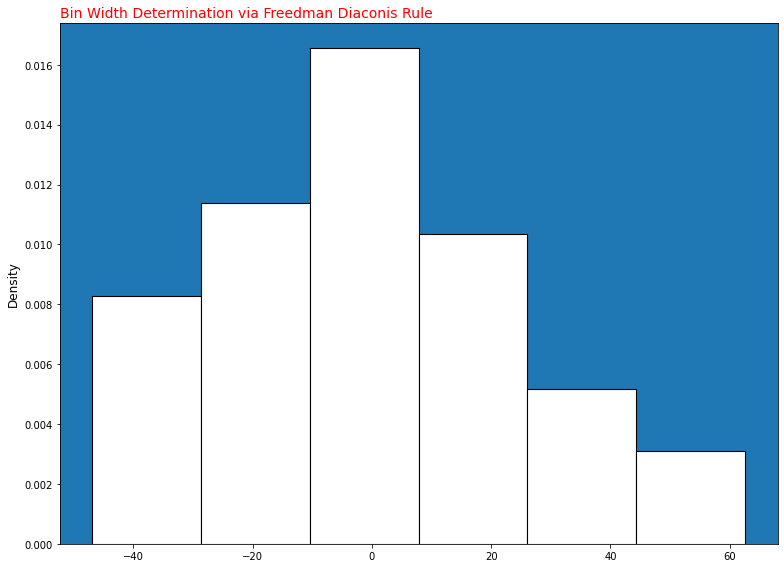

In [31]:
# Use freedman_diaconis function with returnas="bins" to determine histogram bin width.
NBR_BINS=freedman_diaconis(data,returnas="bins")
fig,ax=plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(11,8)
ax.hist(data, NBR_BINS, density=True, color="#FFFFFF", edgecolor="black", linewidth=1.1)
ax.set_title("Bin Width Determination via Freedman Diaconis Rule", fontsize=14, loc="left", color="red")
ax.set_ylabel("Density", fontsize=12, color="#000000")
ax.grid(False)
ax.set_facecolor(None)
plt.tight_layout()
plt.show()

Alternatively, the seaborn library can be used to generate similar, but perhaps more appealing visualizations. We demonstrate seaborn’s distplot, which can alternatively include and overlaid kernel density estimate:

In [37]:
import matplotlib as mpl
import seaborn as sns

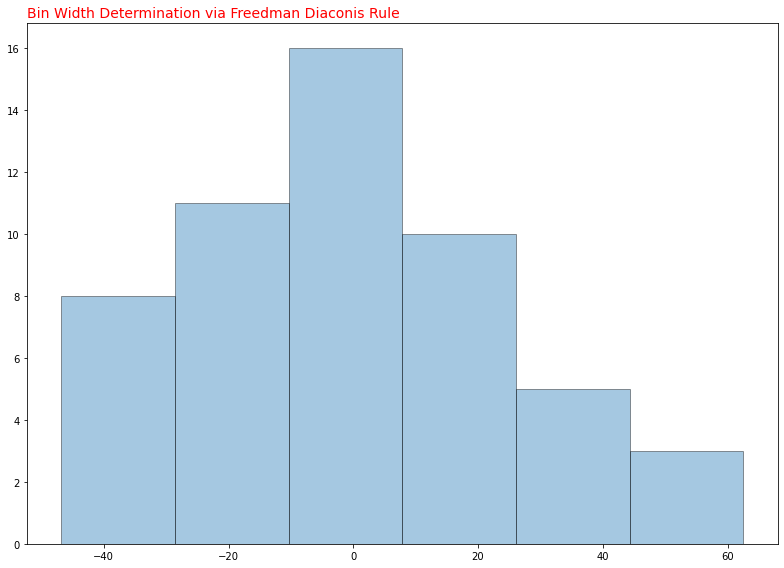

In [43]:
NBR_BINS = freedman_diaconis(data, returnas="bins")
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(11, 8)
hist_plot = sns.distplot(data, bins=NBR_BINS, kde=False, hist_kws=dict(edgecolor="#000000", linewidth=1.0))
ax.set_title("Bin Width Determination via Freedman Diaconis Rule", fontsize=14, loc="left", color="red")
plt.tight_layout()
plt.show()

# Optionally save plot to file.
#hist_plot.savefig("histogram.png")